In [ ]:
"""
I am choosing the 0.034 parameter for the d parameter because biologically this makes the most sense
Purpose:
Find a suppression parameter(kA and n parameters) that creates unlimited prolifeartion

Current Parameter Values:
[alpha, Thy, Thy_max, epsilon, a, c,    b_R, mu, beta, z, g,    b_T, e_T,  e_R,  f, kA, n, d]
[0.006, 1.0, 1.00000, 1.000, 0.1, 0.01, 0.1, 60, 10.0, 1, 0.01, 0.1, 0.03, 0.03, 1, 10, 1, 0.034]

Hypothesis:
There is a value for kA and n that will make the equilbrium point of activated T cells result in 1% Tregs 
to all T cells
"""

In [ ]:
'''
Changes done
'''

In [1]:
from sympy import var
from sympy import solve
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def vectorfield(w, p):
    """
    Defines the differential equations for the Homeostatic Expansion Project.
    We will use fsolve to try to find the where the R, N, T, and I populations lie when they reach equilibrium.
    It tries to find when:
        dRdt(I,R) = 0
        dNdt(N,R) = 0
        dTdt(R,I,T) = 0
        dTdt(T,R,I) = 0
    For the values of R, N, T, I
    We are looking for the roots

    Arguments:
        w :  vector of the state variables:
                  w = [R, N, T, I]
        p :  vector of the parameters:
                  p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    """
    R, N, T, I = w #Values here should be from the steady states found earlier
    alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d = p
   
    Rf = alpha*(Thy/Thy_max) + epsilon*a*I*R + c*N - b_R*R
    Nf = mu*(Thy/Thy_max) - beta*N*(1/(1+(R/kA)**n)) - c*N - g*N
    Tf = beta*N*(1/(1+(R/kA)**n)) + a*I*T - b_T*T
    If = d*T - e_T*I*T - e_R*I*R - f*I   
         
    return [Rf, Nf, Tf, If]

# TEST OUT THE KA PARAMETER

In [3]:
############
#  Thymus  #
############
alpha = 0.006 #------------ T Regulatory Cells
mu = 60   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
c = 0.01 #--------To T regulatory Cells
beta = 10 #------ To activated T cells

###########
#  Tregs  #
###########
epsilon = 1 #------------T regulatory cell Self replication
z       = 1 #------- Strength of suppression on Naive T cell differention to activation
n       = 1 #hill coefficient
# kA      = 10 #halfSaturationRate 

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
d = 0.034 #------- T Cell Expression #This is the value that we want to change.
a = 0.1   #------------Activated T cells
e_T = 0.03 #0.01 #------ T Cell Consumption Rate
e_R = 0.03 #0.01 #------ T Reg Consumption Rate

##################
#  Death Rates   #
##################
g = 0.01 #-----------Naive T cells
b_T = 0.1 #-----------Activated T cells
b_R = 0.1 #----------Regulatory T Cells
f = 1 #-------------IL-2 Cytokine

In [8]:
# A grid of d points to evaluate
dMin = 1;
dMax = 30; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    kA = i #Current value of the kA parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

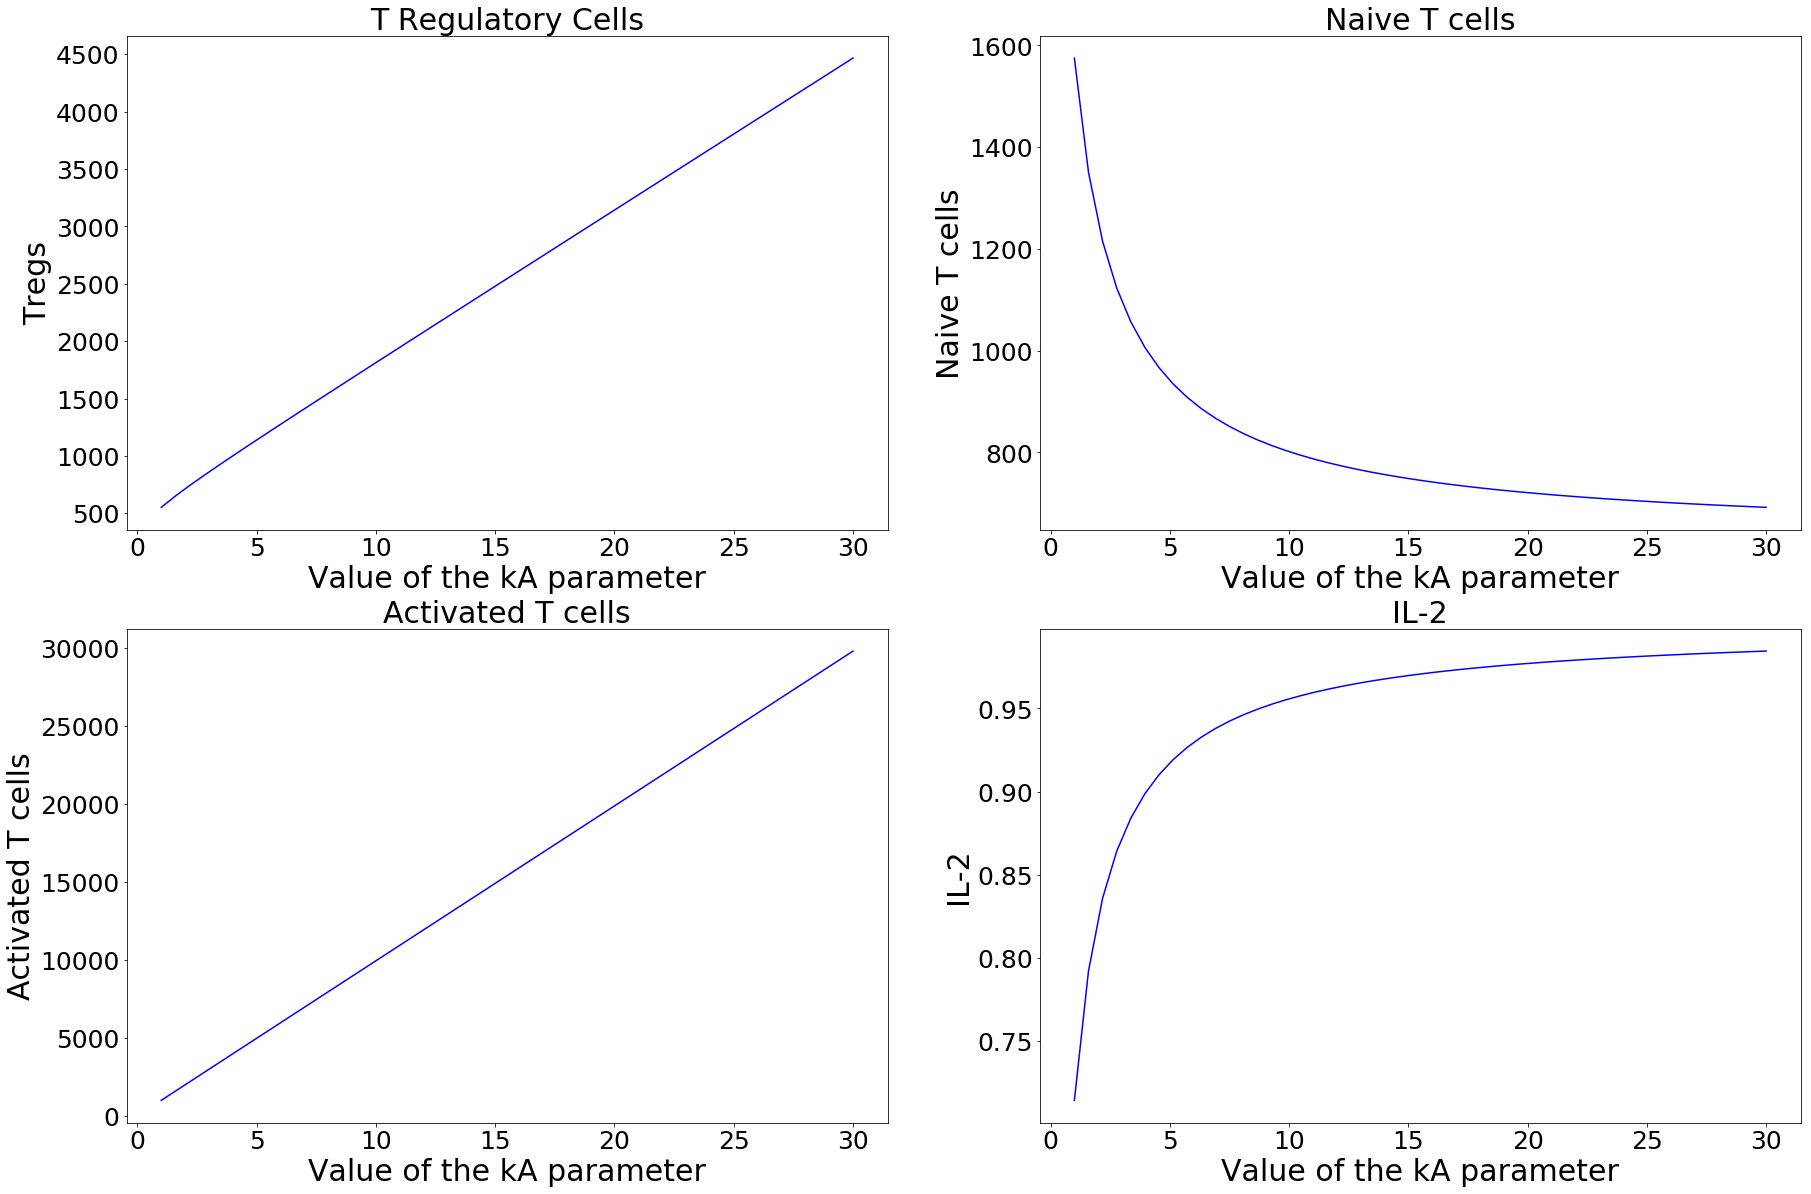

In [9]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the kA parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 30)
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)

#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the kA parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 30)
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the kA parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 30)
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the kA parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 30)
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)

plt.show()

# TEST OUT THE N PARAMETER, AND LEAVING KA = 10

Results of the kA parameters.
Ther higher the kA value the higher the Tregs and Activated T cells

INTERPRETATION:
The increased value of suppression lowers the solid number of Tregs since it is divided by kA. We disregard the n effect because it is left as 1. kA lowers the suppression streangth on the system. 

This means that there are more naive T cells that will be activated, more IL-2 and more Treg cells.

In [30]:
############
#  Thymus  #
############
alpha = 0.006 #------------ T Regulatory Cells
mu = 60   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
c = 0.01 #--------To T regulatory Cells
beta = 10 #------ To activated T cells

###########
#  Tregs  #
###########
epsilon = 1 #------------T regulatory cell Self replication
z       = 1 #------- Strength of suppression on Naive T cell differention to activation
# n       = 1 #hill coefficient
kA      = 10 #halfSaturationRate 

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
d = 0.034 #------- T Cell Expression #This is the value that we want to change.
a = 0.1   #------------Activated T cells
e_T = 0.03 #0.01 #------ T Cell Consumption Rate
e_R = 0.03 #0.01 #------ T Reg Consumption Rate

##################
#  Death Rates   #
##################
g = 0.01 #-----------Naive T cells
b_T = 0.1 #-----------Activated T cells
b_R = 0.1 #----------Regulatory T Cells
f = 1 #-------------IL-2 Cytokine

In [31]:
# A grid of d points to evaluate
dMin = 0;
dMax = 5; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)
dRange = np.around(dRange, 2)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    n = i #Current value of the kA parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

/home/jon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/home/jon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [32]:
# REMOVING EXTREME VALUES
# df.loc[df['column_name'] == some_value]
Il2_d = Il2_d.loc[Il2_d['T'] < 10000]
Il2_d = Il2_d.loc[Il2_d['R'] < 2000]

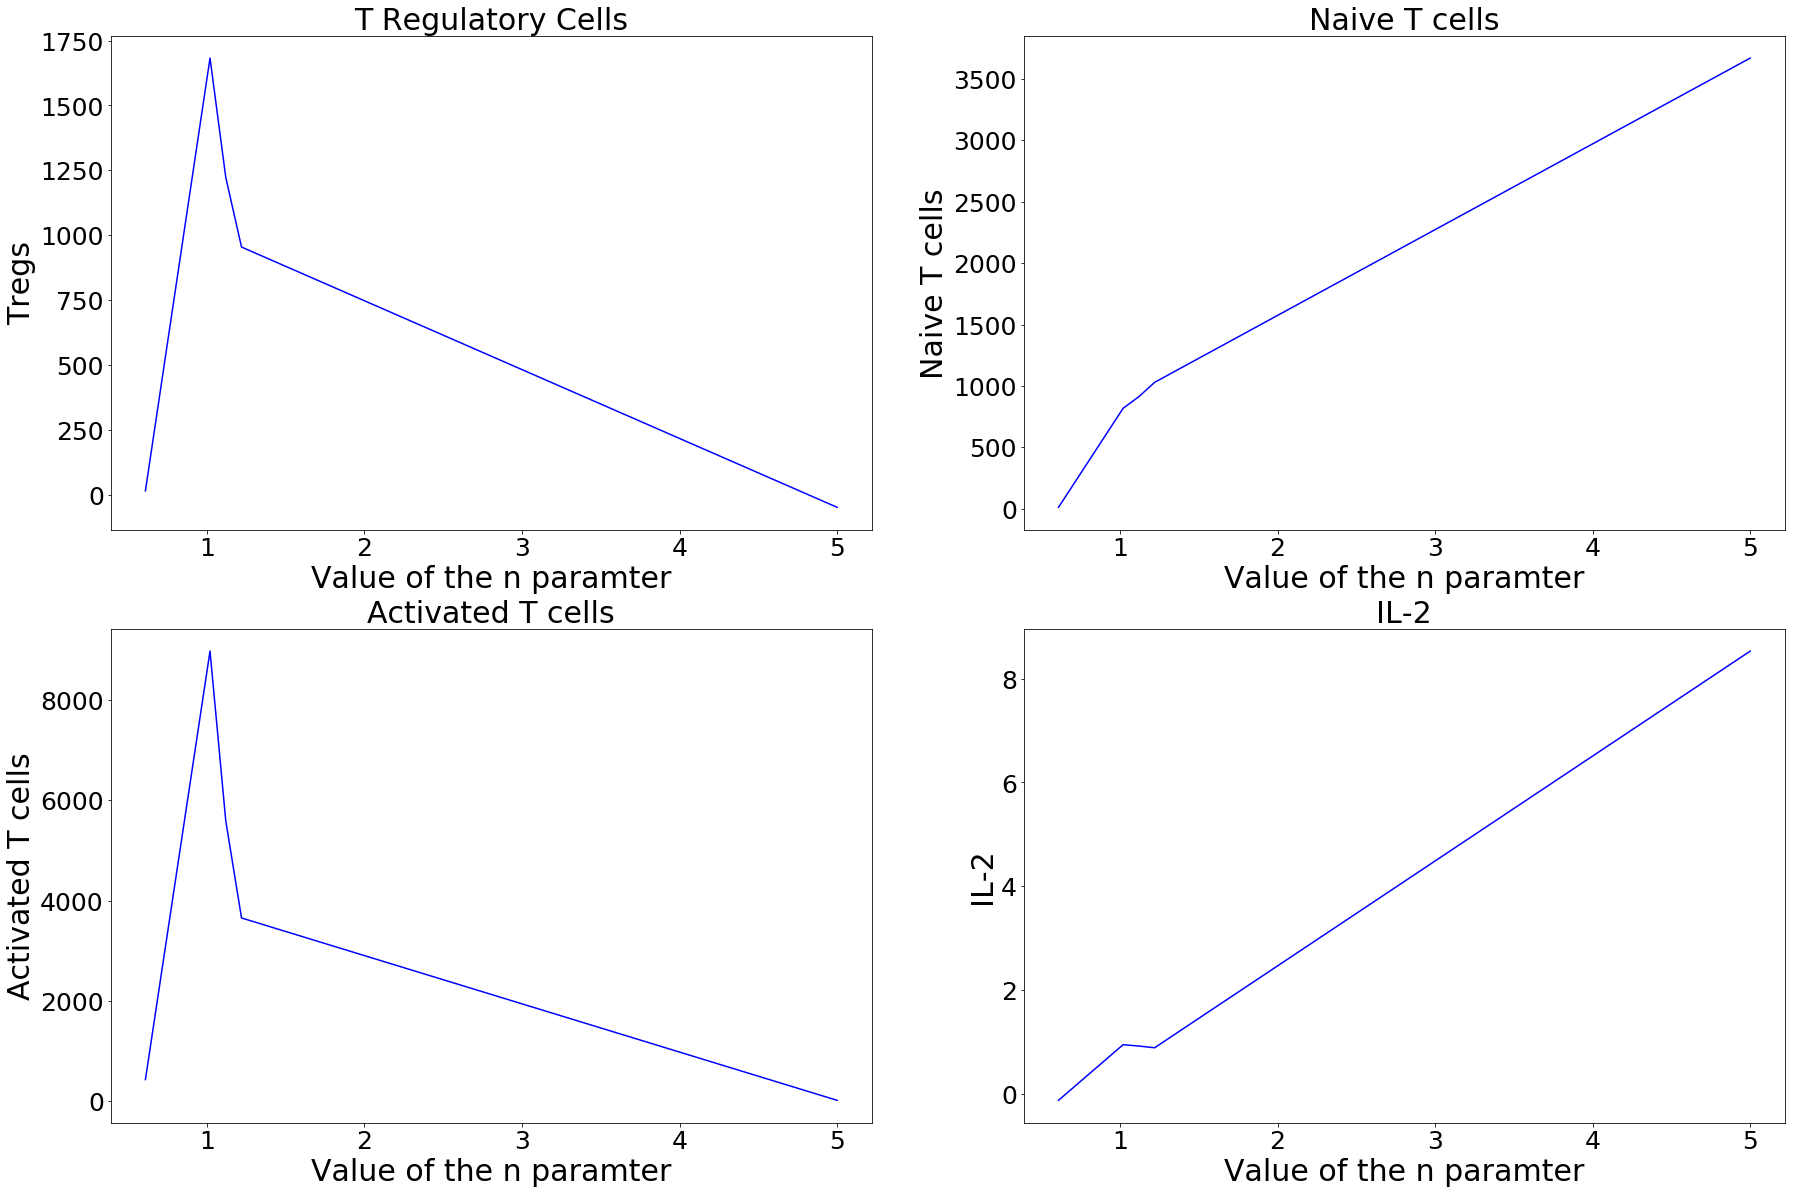

In [33]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the n paramter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 30)
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)

#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the n paramter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 30)
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the n paramter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 30)
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the n paramter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 30)
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)

plt.show()

RESULTS:

n increases the suppression strength. The higher the n the more suppression, the less activated T cells there are, the less IL-2 that is being made. 

# Testing naive T cell expression rate

So i need to figure out a way increase the number of overall T cells in the system. Since we have cells in the millions, and our model is only producing cell numbers in the quad digits, we are grossly distant from the biological numbers

In [3]:
############
#  Thymus  #
############
alpha = 0.006 #------------ T Regulatory Cells
# mu = 60   #---------- Naive T cells
Thy = 1 #------------ Size of the thymus
Thy_max = 1 #------- Max size of the thymus

#########################################
#  Naive T cell Differentiation Rates   #
#########################################
c = 0.01 #--------To T regulatory Cells
beta = 10 #------ To activated T cells

###########
#  Tregs  #
###########
epsilon = 1 #------------T regulatory cell Self replication
z       = 1 #------- Strength of suppression on Naive T cell differention to activation
n       = 1 #hill coefficient
kA      = 10 #halfSaturationRate 

##############################################
#  IL-2 Cytokine Expression and Consumption  #
##############################################
d = 0.034 #------- T Cell Expression #This is the value that we want to change.
a = 0.1   #------------Activated T cells
e_T = 0.03 #0.01 #------ T Cell Consumption Rate
e_R = 0.03 #0.01 #------ T Reg Consumption Rate

##################
#  Death Rates   #
##################
g = 0.01 #-----------Naive T cells
b_T = 0.1 #-----------Activated T cells
b_R = 0.1 #----------Regulatory T Cells
f = 1 #-------------IL-2 Cytokine

In [24]:
# A grid of d points to evaluate
dMin = 30;
dMax = 500; #Need to think about what a reasonable maximum value is.
numD = 50;
dRange = np.linspace(dMin, dMax, numD)

Il2_d = pd.DataFrame(columns = ['R', 'N', 'T', 'I', 'd']) #appending i to the end eq array


# w0 = R N T I
w0 = [500, 275, 10000, 0.95] #Visually determined as close to the equlibrium point

for i in dRange:
    alpha = i #Current value of the kA parameter
    p = [alpha, Thy, Thy_max, epsilon, a, c, b_R, mu, beta, z, g, b_T, e_T, e_R, f, kA, n, d]
    eq = fsolve(vectorfield, w0, args=(p)) #Findst the roots of the equations
    eq = np.append(eq, i) #Adds the parameters to the eq array
    Il2_d.loc[len(Il2_d)] = eq.tolist() #Adds the row of data to the bottom of the IL2_d dataframe. eq converted to list

/home/jon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/jon/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


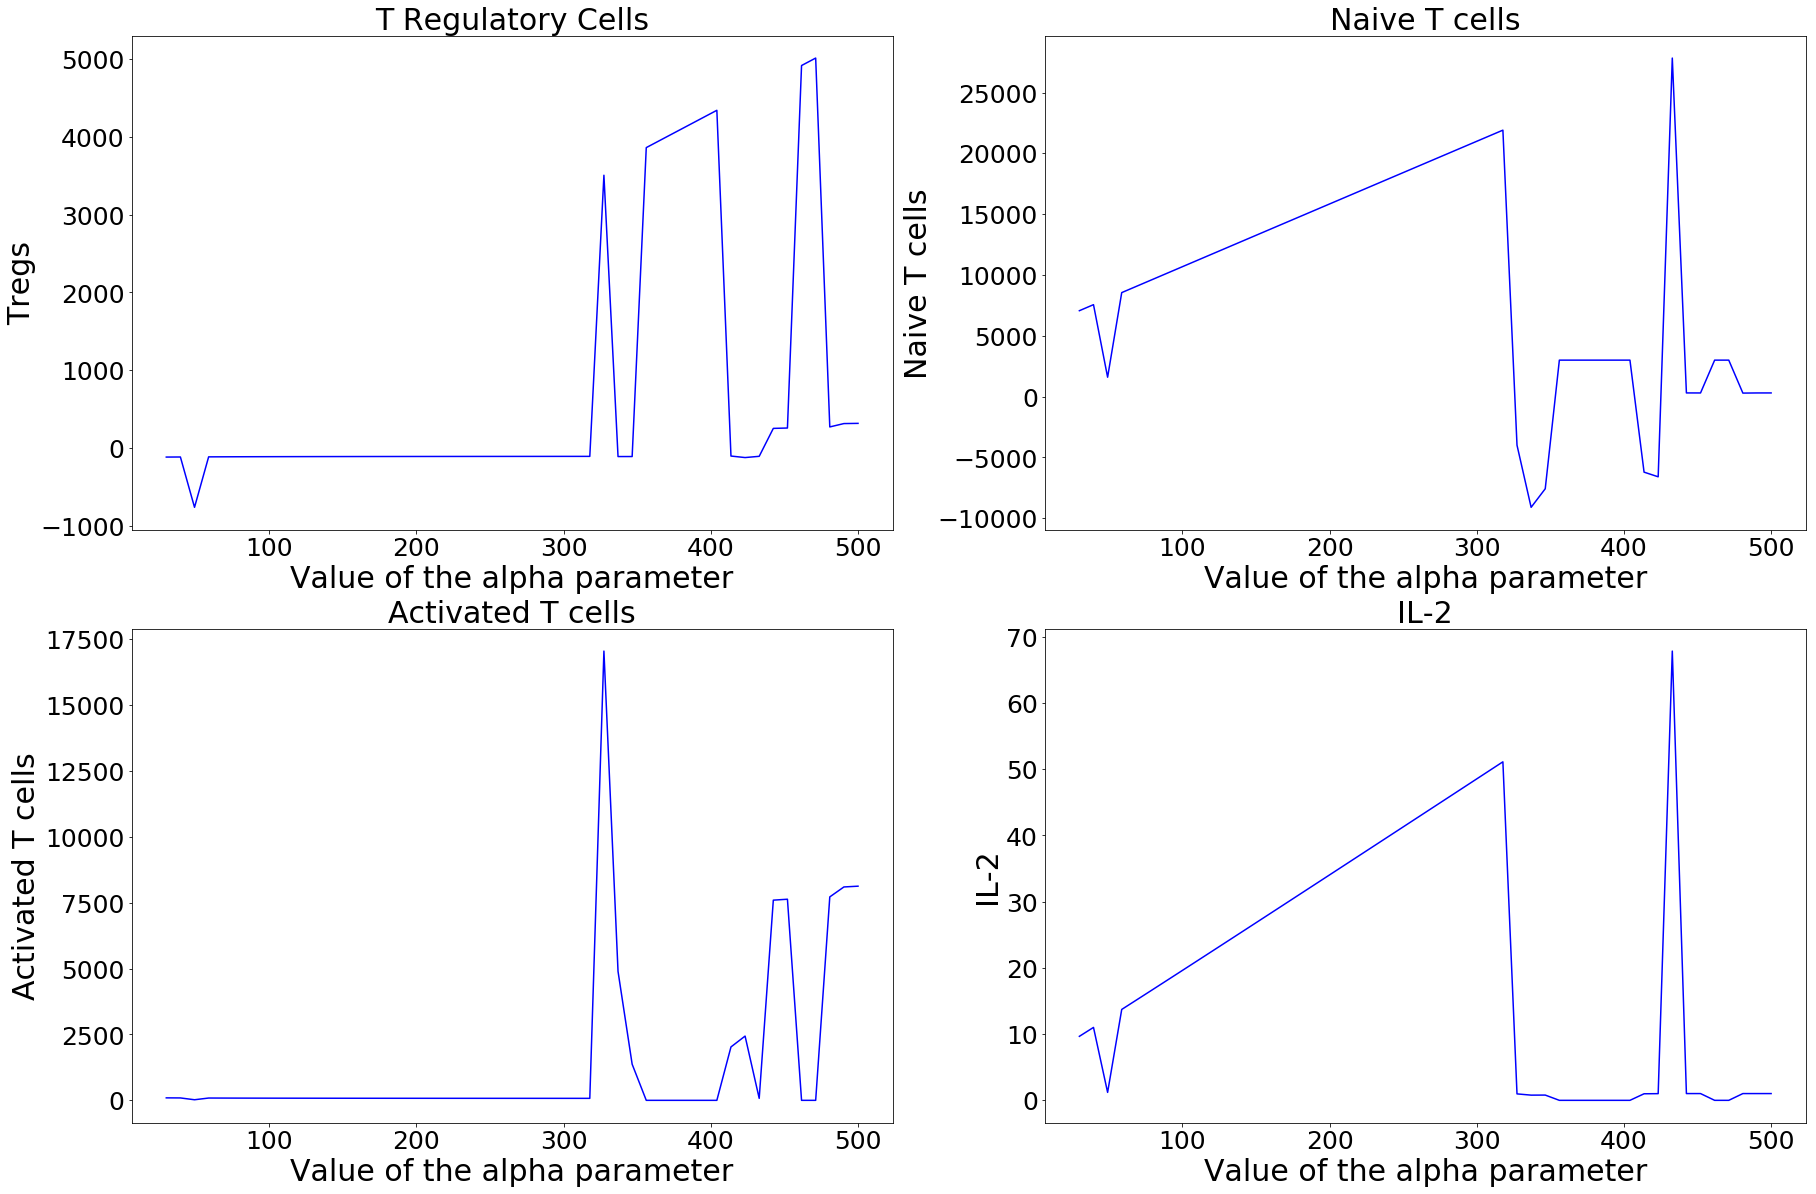

In [25]:
fig = plt.figure(figsize=(30,20))

#Plotting Treg results
Rp = fig.add_subplot(221)
Rp.plot (Il2_d['d'], Il2_d['R'], 'b-')
Rp.set_xlabel('Value of the alpha parameter', fontsize = 30)
Rp.set_ylabel('Tregs', fontsize = 30)
Rp.set_title('T Regulatory Cells', fontsize = 30)
Rp.tick_params(axis="x", labelsize=25)
Rp.tick_params(axis="y", labelsize=25)

#Naive T cells
Np = fig.add_subplot(222)
Np.plot (Il2_d['d'], Il2_d['N'], 'b-')
Np.set_xlabel('Value of the alpha parameter', fontsize = 30)
Np.set_ylabel('Naive T cells', fontsize = 30)
Np.set_title('Naive T cells', fontsize = 30)
Np.tick_params(axis="x", labelsize=25)
Np.tick_params(axis="y", labelsize=25)

#Activated T cells
Tp = fig.add_subplot(223)
Tp.plot (Il2_d['d'], Il2_d['T'], 'b-')
Tp.set_xlabel('Value of the alpha parameter', fontsize = 30)
Tp.set_ylabel('Activated T cells', fontsize = 30)
Tp.set_title('Activated T cells', fontsize = 30)
Tp.tick_params(axis="x", labelsize=25)
Tp.tick_params(axis="y", labelsize=25)

#IL-2 Cytokine
Ip = fig.add_subplot(224)
Ip.plot (Il2_d['d'], Il2_d['I'], 'b-')
Ip.set_xlabel('Value of the alpha parameter', fontsize = 30)
Ip.set_ylabel('IL-2', fontsize = 30)
Ip.set_title('IL-2', fontsize = 30)
Ip.tick_params(axis="x", labelsize=25)
Ip.tick_params(axis="y", labelsize=25)

plt.show()